In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [6]:
fc = pd.read_csv("FuelConsumptionCo2 .csv")

In [7]:
fc

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [9]:
cdf = fc[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(16)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [10]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


In [12]:
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.0,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.0,6.0,8.00,12.0
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.0,10.9,13.35,25.8
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.0,251.0,294.00,488.0


In [13]:
X = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
1062,3.0,6,11.8
1063,3.2,6,11.5
1064,3.0,6,11.8
1065,3.2,6,11.3


In [15]:
y = cdf[["CO2EMISSIONS"]]
y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
print(X_train.shape)
print(X_test.shape)

(746, 3)
(321, 3)


In [21]:
print(lr.intercept_)
print(lr.coef_)

[67.34158931]
[[11.6439771   7.05148496  9.43988389]]


In [22]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [25]:
print("mse", mse)
print("r2", r2)

mse 564.5126971932044
r2 0.8671853128439502


In [26]:
import seaborn as sns

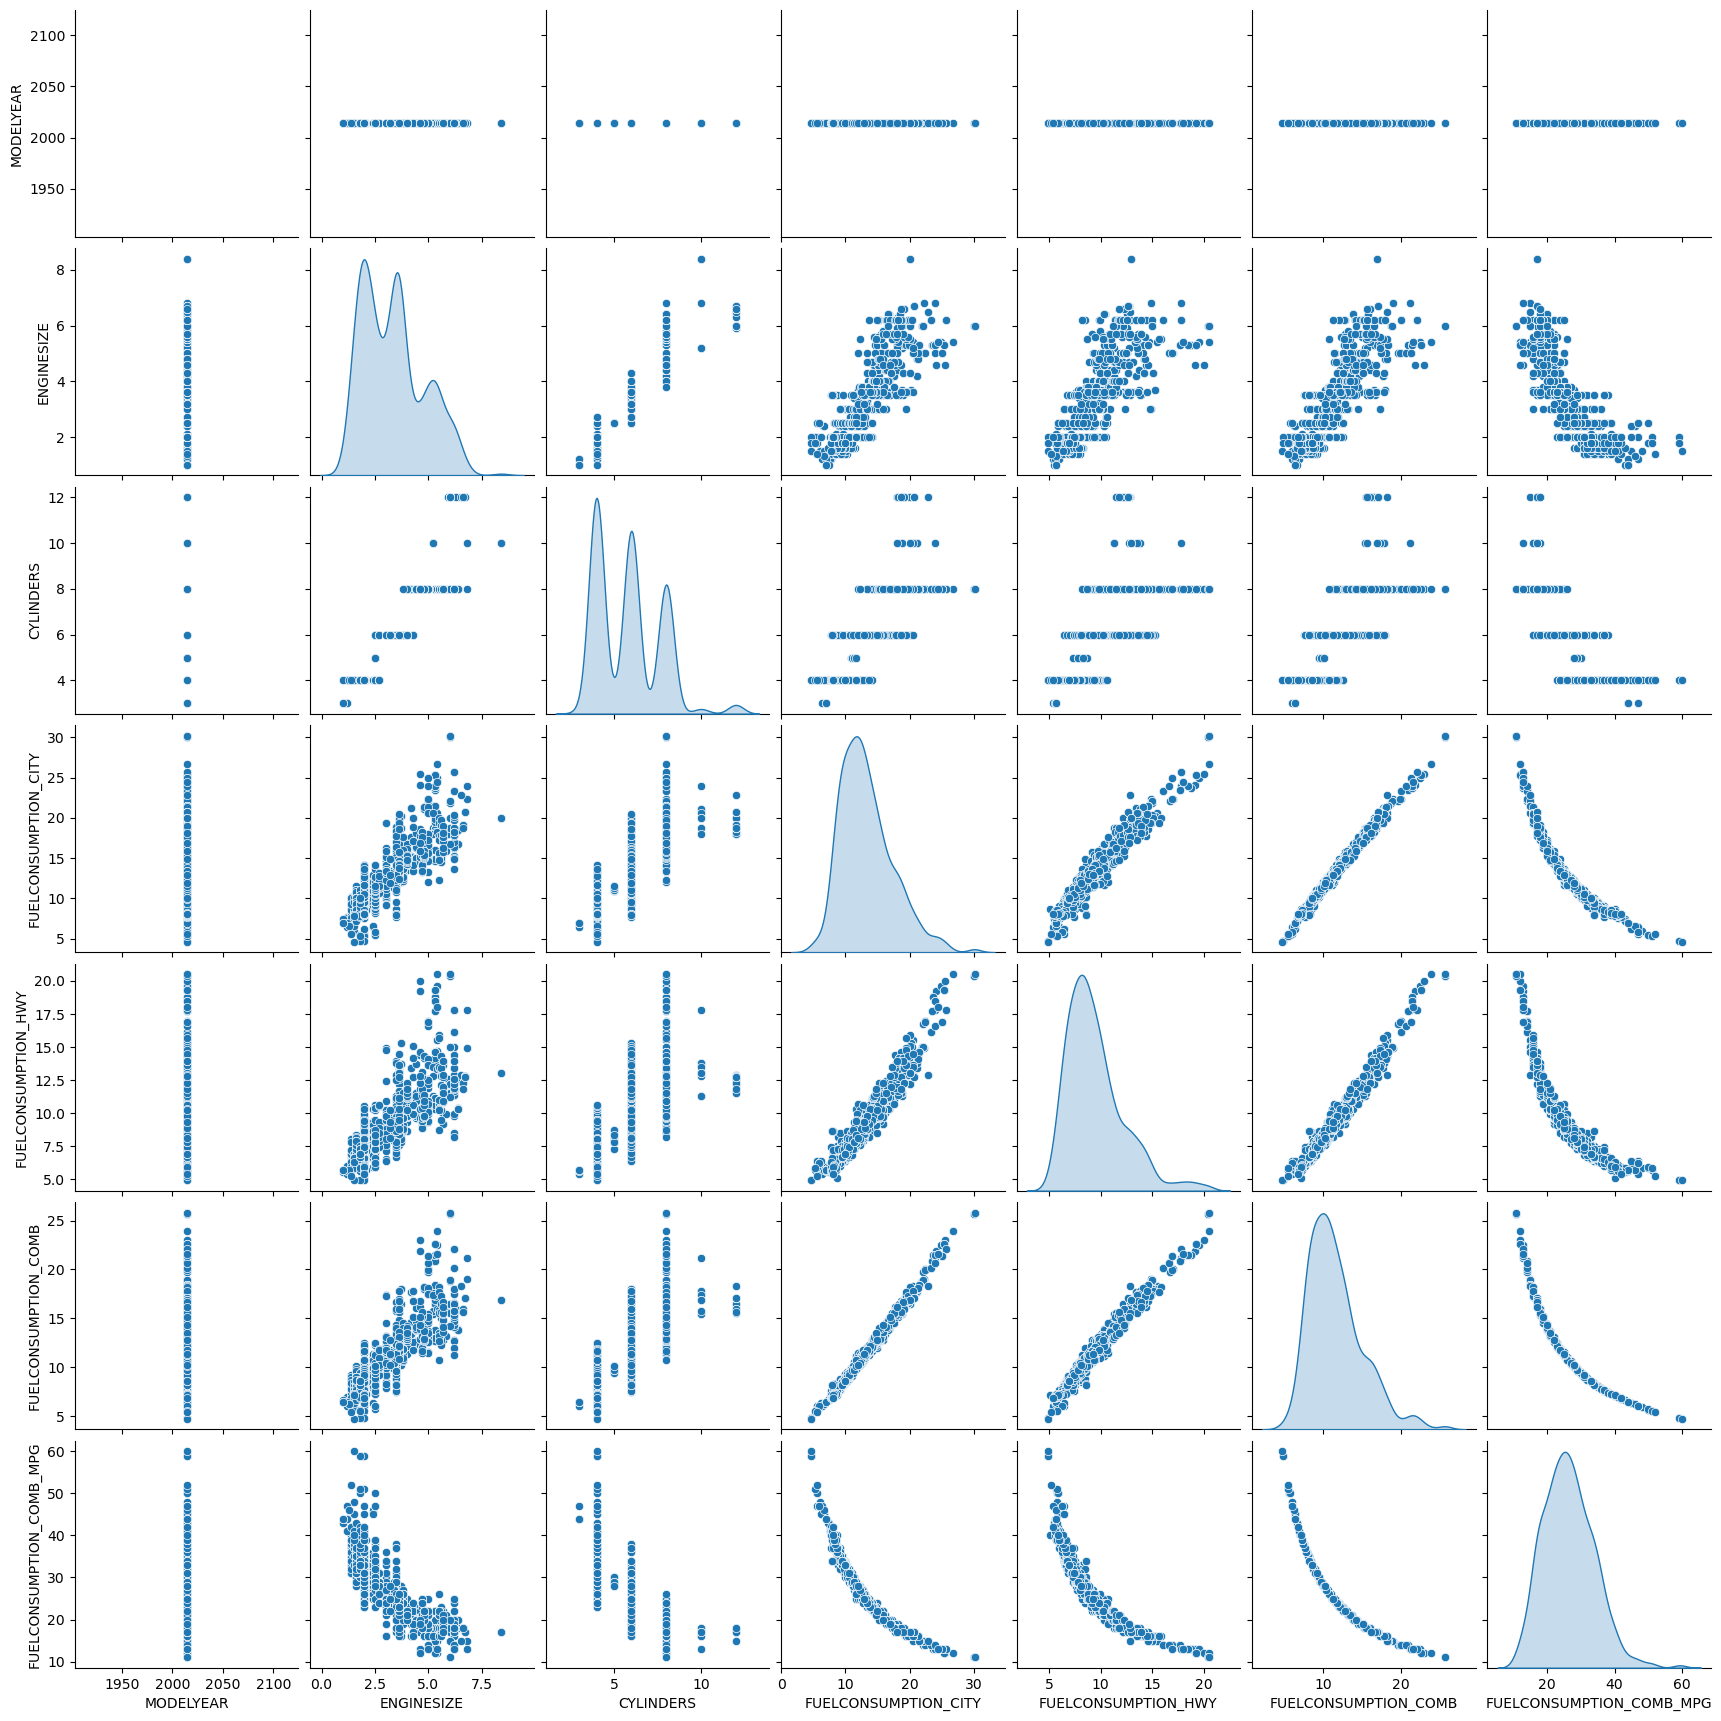

In [28]:
fc_attr = fc.iloc[:, 0:12]
sns.pairplot(fc_attr, diag_kind = "kde");

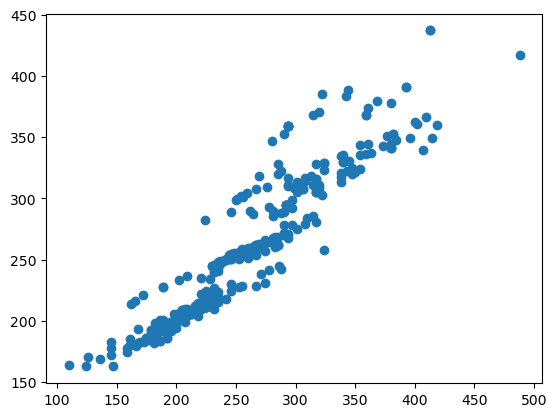

In [29]:
plt.scatter(y_test["CO2EMISSIONS"], y_pred);

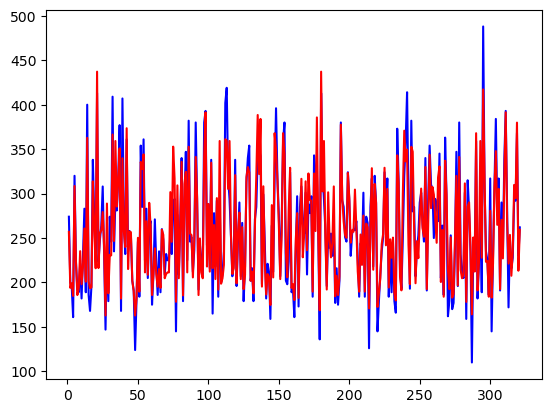

In [30]:
var = [i for i in range(1, 322)]

plt.plot(var, y_test, color = "blue");
plt.plot(var, y_pred, color = "red");